# Model Tuning and Automated Machine Learning

## Model Performance Metrics
We build machine learning models and one of the key process in building the model is to evaluate it. We learnt about variety of metrics to evaluate models, which includes:
- Confusion Matrix

    ![Confusion Matrix](Basic-Confusion-matrix.png)
    
- Sensitivity (also called as Recall or True Positivity Rate)
    - True Positive / (True Positive + False Negative)
- Specificity (also called as True Negative Rate)
    - True Negative / (True Negative + False Positive)
- Precision
    - True Positive / (True Positive + False Positive)
- F1 Score
    - 2 * Precision * Sensitivity / (Precision + Sensitivity)
- Accuracy
    - (True Positive + True Negative) / (True Positive + False Positive + True Negative + False Negative)
- AUC-ROC (Area Under the Curve of Receiver Charcteristic Operator)
    - AUC-ROC curve helps to visualize how well the ML classifier is performing

A Machine Learning Classifier model predicts classes using probabilties. We can define our own threshold to interpret the result of the classifier to assign classes. Setting different thresholds for classifying a class for data points will inadvertently change the Sensitivity and Specificity of the model. 

So if we keep on changing threshold values, we get different confusion matrices. One of the threshold could give better results than others, hence comparing various metrics we can find out which threshold value is optimal. But this is not a good way, instead we can generate a plot between some of these metrics so that we can easily visualize which threshols is giving us better result. The AUC-ROC curve helps to do this.

ROC curve is an evaluation metric for binary classification problems. It is a probability curve that plots TPR against FPR at various threshold values and essentially separates **Signal** from **Noise**. The AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. 

**Higher the AUC, the better the performance of the model at distinguishing between the positive and negative classess**
* When AUC=1, then classifier is able to perfectly distinguish all Positive and Negative Classes
* When AUC is greater than 0.5 and less than 1, there is a high chance that classifier able to distinguish positive class values from negative class values. 
* When AUC is 0.5, then its like tossing a coin. The classifier not able to distinguish between positive and negative class points. 

In [61]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [62]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [64]:
len(pred_prob1)

300

In [65]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [74]:
p_tpr

array([0., 1.])

In [33]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


In [75]:
roc_auc_score(y_test, random_probs)

0.5

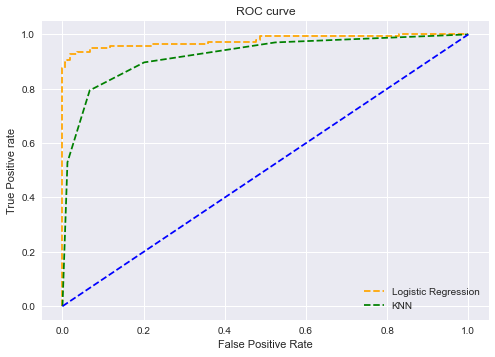

In [76]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

## HyperParameters

As opposed to parameters (like the ones in linear regression slope and constant term) which change based on the data for a given parametric model, hyper-parameters are preset values even before a non-parametric model gets trained on the data. These parameters are preset and don't change while training.

The process of setting the right hyper-parameters to get max performance out of a given model, is called **Hyper-parameter Tuning**

For e.g. in K-Nearest Neighbours algorithm, the number of neighbours is an HyperParameter. In SVC algorithm the kernel is an HyperParameter

## Stages involved in building a ML Model
Building any machine learning models follows a sequence of process(workflow) similar to an application development and deployment. This sequence of process we typically call as Pipeline. Following is the typical Machine Learning Workflow sequence:
1. Data Ingestion
2. Data Cleansing / Preprocessing / Transformation
3. Data Modelling (Train & Test)
4. Model Evaluation
5. Model Deployment

ML Pipelines are the carriers that connect one process with another so that there is just one junction for input and one for output. Modern applications are dependent on pipeline architecture which connects ML services with existing DevOps Processes. This is shaping now-a-day as MLOps.

When we do any projects we pretty much follow the above workflow. Typically we do:
1. Reading the data from a file (Data Load or Ingestion)
2. Then we do identify missing values and outliers. Remove or handle it (Data Cleansing)
3. Then we do Exploratory Data Analytics, reduce or increase dimensions based on our understanding. Normalise the scale or perform log transformation (Data Preprocessing / Transformation)
4. Then finally try various models, validate / measure, tune hyper parameters to improve the key metrics (Data Modelling / Evaluation)
5. Once we settle down on the right model & hyper parameters then we save the model and provide it for production deployment

So for we have seen these using Python Notebooks and pretty much done manually all the steps. Everytime I want to try a new model I need to repeat variety of the above steps. This is where ML Pipeline comes into play.

## ML Workflow in python
The execution of the workflow is in a pipe-like manner, i.e. the output of the first steps becomes the input of the second step. Scikit-learn is a powerful tool for machine learning, provides a feature for handling such pipes under the sklearn.pipeline module called Pipeline. It takes 2 important parameters, stated as follows: 
- **The Stepslist:** List of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.
- **Verbose**

## Simple Code to look into how Python Pipeline works

In [77]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

# import some data within sklearn for iris classification
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
# Splitting data into train and testing part
# The 25 % of data is test size of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline
# pipe flow is :
# PCA(Dimension reduction to two) -> Scaling the data -> DecisionTreeClassification
pipe = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
 
# fitting the data in the pipe
pipe.fit(X_train, y_train)
 
# scoring data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.0s
0.9736842105263158


In [78]:
# Let's view all the Hyper Parameters
pipe.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=2)),
  ('std', StandardScaler()),
  ('decision_tree', DecisionTreeClassifier())],
 'verbose': True,
 'pca': PCA(n_components=2),
 'std': StandardScaler(),
 'decision_tree': DecisionTreeClassifier(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'std__copy': True,
 'std__with_mean': True,
 'std__with_std': True,
 'decision_tree__ccp_alpha': 0.0,
 'decision_tree__class_weight': None,
 'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': None,
 'decision_tree__max_features': None,
 'decision_tree__max_leaf_nodes': None,
 'decision_tree__min_impurity_decrease': 0.0,
 'decision_tree__min_impurity_split': None,
 'decision_tree__min_samples_leaf': 1,
 'decision_tree__min_samples_split': 2,
 'decision_tree__min_weight_fraction_leaf': 0.0,
 'decision_tree__random_state': None,
 'decision_tree__splitter':

## Let's look little complex problem 
Source: Star Type Classification from Kaggle (https://www.kaggle.com/brsdincer/star-type-classification)

In [79]:
# Required Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline

In [80]:
# Load Data
df = pd.read_csv("Stars.csv")
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [81]:
# Understand Target Variable
df.Type.value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

**Target Variable**
* Red Dwarf --- 0
* Brown Dwarf --- 1
* White Dwarf --- 2
* Main Sequence --- 3
* Super Giants --- 4
* Hyper Giants --- 5

In [82]:
df.Spectral_Class.value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

In [83]:
# As Spectral Class 'G' has only one row, we can't use it for proper Train & Test Split. Hence dropping it
df.drop(df[df.Spectral_Class == 'G'].index[0], inplace=True)

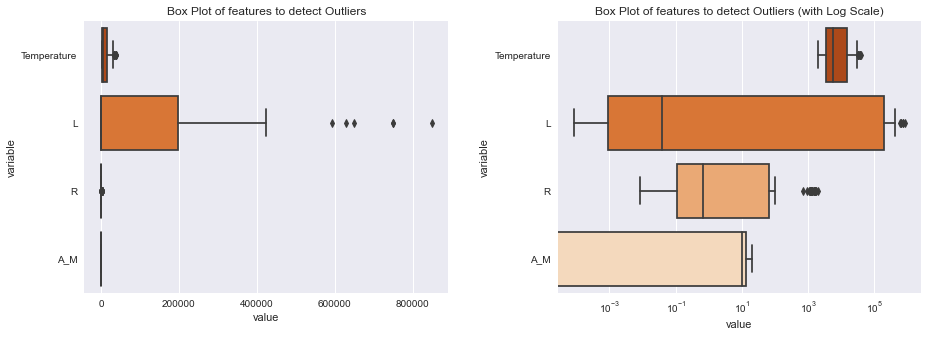

In [84]:
# EDA
import seaborn as sns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Type'), df['Type'],
                                                    test_size=0.30, random_state=1,
                                                    stratify= df['Spectral_Class'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.set_title('Box Plot of features to detect Outliers')
ax2.set_title('Box Plot of features to detect Outliers (with Log Scale)')
ax2.set_xscale('log')
plt.subplots_adjust(wspace=0.3)
ax1 = sns.boxplot(y="variable", x="value", data=pd.melt(X_train[['Temperature','L','R','A_M']]),
            palette='Oranges_r', ax=ax1)
ax2 = sns.boxplot(y="variable", x="value", data=pd.melt(X_train[['Temperature','L','R','A_M']]),
            palette='Oranges_r', ax=ax2)

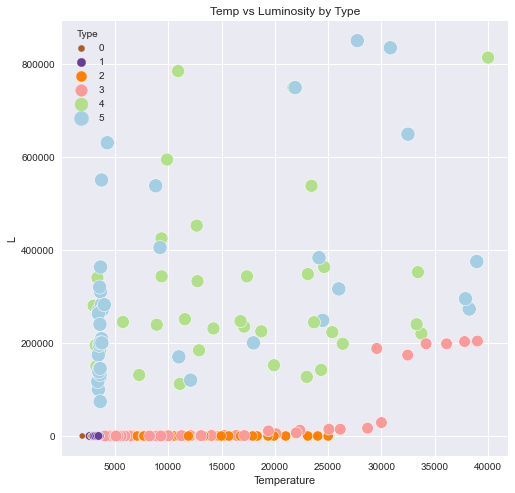

In [85]:
fig, ax_sns = plt.subplots(figsize=(8,8))
ax_sns.set_title('Temp vs Luminosity by Type')
ax_sns = sns.scatterplot(data=df, x='Temperature',
                         y='L', hue='Type',
                         size='Type', sizes=(40, 200),
                         palette='Paired_r', ax=ax_sns)

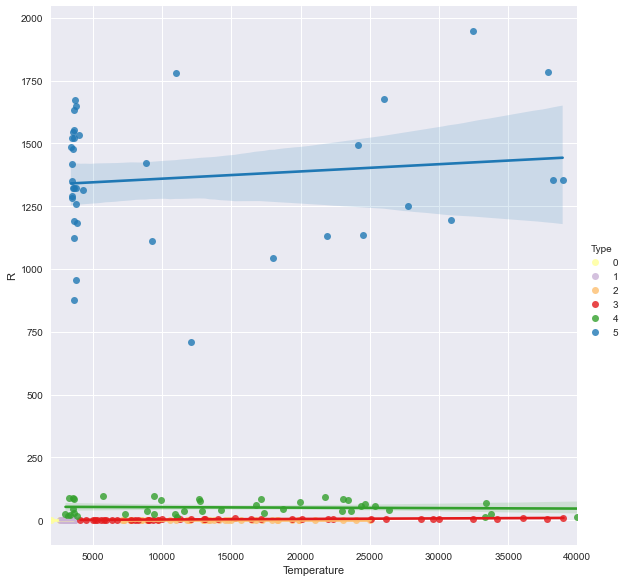

In [86]:
g = sns.lmplot(x='Temperature', y='R',
           data=df, hue='Type',
           palette='Paired_r', height=(8))
g.set_titles('Fitting Linear Model to estimate the Type')

In [45]:
# Define Data Preprocesor Classes

class NumericalPreprocessor(BaseEstimator, TransformerMixin):
    #Class Constructor
    def __init__(self):
        self._scalar = RobustScaler()
        return None
    # Return self nothing else to do here
    def fit(self, X, y =None):
        X = self._scalar.fit(X)
        return self
    # Remove Outliers
    def remove_outliers(self, X):
        for col in X.columns:
            Q1 = df[col].quantile(0.2)
            Q3 = df[col].quantile(0.8)
            IQR = Q3 - Q1
            # Adjusting outliers with their percentile values
            low = Q1 - 1.5 * IQR
            high = Q3 + 1.5 * IQR
            X[col] = np.where(X[col] < low, low, X[col])
            X[col] = np.where(X[col] > high, high, X[col])
        return X
    # Method calls several cleaner functions
    def transform(self, X, y = None):
        # Removing Outliers
        X = self.remove_outliers(X)
        # Scaling Features
        X = pd.DataFrame(self._scalar.transform(X), columns=X.columns, index=X.index)
        return X

class CategoricalPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    def fit(self, X, y=None):
        return self
    def get_features(self):
        return self.column_names
    def catToDummy(self, X):
        X = pd.get_dummies(X)
        return X
    def transform(self, X, y=None):
        X = self.catToDummy(X)
        return X

In [87]:
numerical_columns = ['Temperature', 'L', 'R', 'A_M']
categorical_columns = ['Spectral_Class']

# ColumnTransformer
# Applies transformers to columns of an array or pandas DataFrame. This estimator allows different columns or column subsets of the input to be 
# transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for 
# heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

transformer = ColumnTransformer(transformers = [
                                                ("numerical", NumericalPreprocessor(), numerical_columns), 
                                                ("categorical", CategoricalPreprocessor(), categorical_columns)
                                               ], remainder='drop')
transformer.fit(X_train)

ColumnTransformer(transformers=[('numerical', NumericalPreprocessor(),
                                 ['Temperature', 'L', 'R', 'A_M']),
                                ('categorical', CategoricalPreprocessor(),
                                 ['Spectral_Class'])])

In [88]:
# Create Pipeline
model = Pipeline(steps=[("pre-processor", transformer),
                        ("KNN", KNeighborsClassifier(n_neighbors=10, leaf_size=10))])
model.fit(X_train, y_train)

Pipeline(steps=[('pre-processor',
                 ColumnTransformer(transformers=[('numerical',
                                                  NumericalPreprocessor(),
                                                  ['Temperature', 'L', 'R',
                                                   'A_M']),
                                                 ('categorical',
                                                  CategoricalPreprocessor(),
                                                  ['Spectral_Class'])])),
                ('KNN', KNeighborsClassifier(leaf_size=10, n_neighbors=10))])

In [89]:
model.score(X_train, y_train)

0.9640718562874252

In [90]:
result = cross_val_score(model, X_train, y_train, cv = KFold(n_splits=3), error_score=-1)
 
print("Avg accuracy: {}".format(max(result)))

Avg accuracy: 0.9821428571428571


In [91]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.94      1.00      0.97        33
           2       0.97      1.00      0.98        28
           3       0.95      0.84      0.89        25
           4       0.93      0.93      0.93        27
           5       1.00      1.00      1.00        30

    accuracy                           0.96       167
   macro avg       0.96      0.96      0.96       167
weighted avg       0.96      0.96      0.96       167



In [92]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.70      1.00      0.82         7
           2       0.92      1.00      0.96        12
           3       0.91      0.67      0.77        15
           4       0.77      0.77      0.77        13
           5       1.00      1.00      1.00         9

    accuracy                           0.89        72
   macro avg       0.88      0.91      0.89        72
weighted avg       0.90      0.89      0.89        72



In [93]:
model.predict_proba(X_train)

array([[0. , 0. , 0.9, 0.1, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0.3, 0.7, 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. ]])

In [94]:
from sklearn.svm import SVC
model = Pipeline(steps=[("pre-processor", transformer),
                        ("SVM", SVC())])
model.fit(X_train, y_train)

Pipeline(steps=[('pre-processor',
                 ColumnTransformer(transformers=[('numerical',
                                                  NumericalPreprocessor(),
                                                  ['Temperature', 'L', 'R',
                                                   'A_M']),
                                                 ('categorical',
                                                  CategoricalPreprocessor(),
                                                  ['Spectral_Class'])])),
                ('SVM', SVC())])

In [95]:
result = cross_val_score(model, X_train, y_train, cv = 5, error_score=-1)
 
print("Avg accuracy: {}".format(max(result)))

Avg accuracy: 0.8823529411764706


In [96]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.21      0.34        24
           1       0.63      1.00      0.78        33
           2       1.00      1.00      1.00        28
           3       0.96      1.00      0.98        25
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        30

    accuracy                           0.88       167
   macro avg       0.93      0.86      0.85       167
weighted avg       0.92      0.88      0.86       167



In [97]:
model.get_params()

{'memory': None,
 'steps': [('pre-processor',
   ColumnTransformer(transformers=[('numerical', NumericalPreprocessor(),
                                    ['Temperature', 'L', 'R', 'A_M']),
                                   ('categorical', CategoricalPreprocessor(),
                                    ['Spectral_Class'])])),
  ('SVM', SVC())],
 'verbose': False,
 'pre-processor': ColumnTransformer(transformers=[('numerical', NumericalPreprocessor(),
                                  ['Temperature', 'L', 'R', 'A_M']),
                                 ('categorical', CategoricalPreprocessor(),
                                  ['Spectral_Class'])]),
 'SVM': SVC(),
 'pre-processor__n_jobs': None,
 'pre-processor__remainder': 'drop',
 'pre-processor__sparse_threshold': 0.3,
 'pre-processor__transformer_weights': None,
 'pre-processor__transformers': [('numerical',
   NumericalPreprocessor(),
   ['Temperature', 'L', 'R', 'A_M']),
  ('categorical', CategoricalPreprocessor(), ['Spectral_Cla

## GridSearch and RandomSearch
- Both are the two most common methods of choosing the right hyper-parameters
- In Grid search, each and every combination of hyper-parameters tested before selecting the ‘best’ combination of hyper-parameters
- In Random search, only a subset of combinations can be tested before selecting the ‘best’ combination of hyper-parameters 
- We use Random Search when the parameter grid is fairly large and we want to save on processing time 
- GridSearchCV and RandomizdSearchCV are included in the sklearn library to perform the same over a parameter grid, that is passed as an argument to the functions along with the estimator

In [98]:
from sklearn.model_selection import GridSearchCV
parameteres = {'SVM__C':[1.0,0.001,0.1,10,100,10e5], 'SVM__gamma':['scale',0.1,0.01], 'SVM__kernel':['rbf','linear','sigmoid','poly']}
grid = GridSearchCV(model, param_grid=parameteres, cv=5)

In [99]:
grid.fit(X_train, y_train)
grid.score(X_train, y_train)

0.8802395209580839

In [100]:
grid.best_params_

{'SVM__C': 1.0, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}

In [101]:
from sklearn.model_selection import RandomizedSearchCV
rcv = RandomizedSearchCV(model, param_distributions=parameteres, cv=5)

In [102]:
rcv.fit(X_train, y_train)
rcv.score(X_train, y_train)

1.0

In [103]:
rcv.best_params_

{'SVM__kernel': 'linear', 'SVM__gamma': 'scale', 'SVM__C': 100}

## References

1. [https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)
2. [https://towardsdatascience.com/pipelines-automated-machine-learning-with-hyperparameter-tuning-part-1-b9c06a99d3c3](https://towardsdatascience.com/pipelines-automated-machine-learning-with-hyperparameter-tuning-part-1-b9c06a99d3c3)
3. [https://www.geeksforgeeks.org/pipelines-python-and-scikit-learn/](https://www.geeksforgeeks.org/pipelines-python-and-scikit-learn/)